In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [3]:
mnist=tf.keras.datasets.mnist
(train_img,train_lb),(test_img,test_lb)=mnist.load_data()

In [6]:
train_img=train_img/255.
test_img=test_img/255
len(train_lb)
print(np.shape(train_img), np.shape(train_lb), train_img[0].shape)

(60000, 28, 28) (60000,) (28, 28)


In [4]:
#train_lb=tf.keras.utils.to_categorical(train_lb,10)
#test_lb=tf.keras.utils.to_categorical(test_lb,10)

In [14]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=train_img[0].shape))
model.add(tf.keras.layers.Dense(50,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(train_img,train_lb,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4912 - acc: 0.8831
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2295 - acc: 0.9349
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1791 - acc: 0.9487
Epoch 4/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1485 - acc: 0.9580
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1278 - acc: 0.9634
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1125 - acc: 0.9677
Epoch 7/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1005 - acc: 0.9714
Epoch 8/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0903 - acc: 0.9747
Epoch 9/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0820 - acc: 0.9766
Epoch 10/10
60000/60000 [==============================] - 7s 125us/sampl

In [16]:
(test_loss,test_acc)=model.evaluate(test_img,test_lb)
print('Test acc: ',test_acc)

10000/10000 [==============================] - 1s 64us/sample - loss: 2.4248 - acc: 0.0980
Test acc:  0.098


9  ----->  9


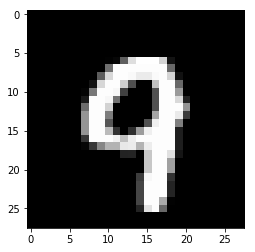

In [13]:
index=randint(0,len(test_img))
prediction=model.predict(test_img)
ans=np.argmax(prediction[index])
print(ans,' -----> ',test_lb[index])
plt.imshow(test_img[index],'gray')